# Семинар 15
# Метод сопряжённых градиентов (Conjugate gradient method): гадкий утёнок 

## На прошлом семинаре

1. Метод Ньютона
2. Теоремы сходимости
4. Сравнение с градиентным спуском
5. Квазиньютоновские методы

## Система линейных уравнений vs. задача безусловной миимизации
Рассмотрим задачу
$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$
где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем
$$
Ax^* = b
$$
Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Как решить систему $Ax = b$?

- Прямые методы основаны на матричных разложениях:
    - Плотная матрица $A$: для размерностей не больше нескольких тысяч
    - Разреженная (sparse) матрица $A$: для размерностей порядка $10^4 - 10^5$
- Итерационные методы: хороши во многих случаях, единственный подход для задач с размерностью $ > 10^6$

## Немного истории...

M. Hestenes и E. Stiefel предложили *метод сопряжённых градиентов* для решения систем линейных уравнений в 1952 году как **прямой** метод. 

Также долгое время считалось, что метод представляет только теоретический интерес поскольку
- метод сопряжённых градиентов не работает на логарифмической линейке
- метод сопряжённых градиентов имеет небольшое преимущество перед исключением Гаусса при вычислениях на калькуляторе 

Метод сопряжённых градиентов необходимо рассматривать как итерационный метод!

Подробнее [здесь](https://www.siam.org/meetings/la09/talks/oleary.pdf)

## Метод сопряжённых направлений

В градиентном спуске предлагалось двигаться вдоль градиентов, но для функций с вытянутыми линиями уровня сходимость замедлялась.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 
$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Утверждение.** Для любой $x_0 \in \mathbb{R}^n$ последовательность $\{x_k\}$, генерируемая методом сопряжённых направлений, сходится к решению системы $Ax = b$ максимум за $n$ шагов.

```python
def ConjugateDirections(x0, A, b, p):
    x = x0
    r = A.dot(x) - b
    for i in xrange(len(p)):
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        x = x + alpha * p[i]
        r = A.dot(x) - b
    return x
```

### Примеры сопряжённых направлений

- Собственные векторы матрицы $A$
- Для любого набора из $n$ векторов можно провести аналог ортогонализации Грамма-Шмидта и получить сопряжённые направления

**Вопрос:** что такое ортогонализация Грамма-Шмидта? :)

### Геометрическая интерпретация (Mathematics Stack Exchange)

<center><img src="./cg.png" ></center>

## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:
$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap^{\top}_{k-1}}
$$
Таким образом, для получения следующего сопряжённого направления необходимо хранить только сопряжённое направление и остаток с предыдущей итерации. 

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов мойдётся за $r$ итераций.


**Теорема 2.** Имеет место следующая оценка сходимости
$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$
где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - число обусловленности матрицы $A$

**Замечание:** сравните коэффициент геометрической прогрессии с аналогом в градиентном спуске.

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}(A) = \{b, Ab, A^2b, \ldots \}$

### Улучшенная версия метода сопряжёных градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:
$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap^{\top}_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$
**Вопрос:** чем они лучше базовой версии?

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b):
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) != 0:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического выражения. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0):
    x = x0
    grad = gradf(x)
    p = -grad
    while np.linalg.norm(gradf(x)) != 0:
        alpha = StepSearch(x, f, gradf, **kwargs)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
    return x
```

### Теоремы сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда
$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Комментарии
- Замечательная методичка размещена [тут](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Помимо метода Флетчера-Ривса существуют другие способы вычисления $\beta_k$: метод Полака-Рибьера, метод Хестенса-Штифеля...
- Для метода сопряжённых градиентов требуется 4 вектора: каких?
- Самой дорогой операций является умножение матрицы на вектор или вычисление скалярных произведений
- Методика рестартов: удаление истории $(\beta_m = 0)$ и перезапуск алгоритма с текущей точки
- **Отсутствует** свойство оптимальности решения на Крыловском подпространстве 

## Эксперименты


### Квадратичная целевая функция

In [1]:
import numpy as np
n = 100
# A = np.random.randn(n, n)
# A = A.T.dot(A)
A = np.diagflat([np.ones(n/4), 4 * np.ones(n/4), 10*np.ones(n/4), 20* np.ones(n/4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
b = np.random.randn(n)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.random.randn(n)

#### Распределение собственных значений

/home/alex/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


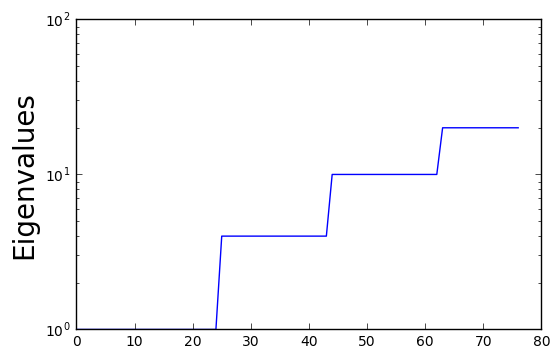

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

eigs = np.linalg.eigvals(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)

#### "Правильный" ответ

In [3]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [4]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print "||f'(x*)|| =", np.linalg.norm(A.dot(x) - b)
print "f* =", f(x)

||f'(x*)|| = 1.15997894933
f* = -18.8407687342


#### Реализация метода сопряжённых градиентов

In [5]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [6]:
import code
quad_cg_array = []
quad_callback = lambda x: callback(x, quad_cg_array)
x = ConjugateGradientQuadratic(x0, A, b, tol=1e-7, callback=quad_callback)
print "CG quadratic"
print "f* =", f(x)
print "||f'(x*)|| =", np.linalg.norm(A.dot(x) - b)
quad_grad_array = []
grad_callback = lambda x: callback(x, quad_grad_array)
x = code.GradientDescent(f, grad_f, x0, 1e-7, 200, code.quad_exact_linesearch, callback=grad_callback, A=A)
print "Gradient Descent"
print "f* =", f(x["x"])
print "||f'(x*)|| =", np.linalg.norm(A.dot(x["x"]) - b)
print "Condition number of A =", max(eigs).real / min(eigs).real 

CG quadratic
f* = -19.3742361694
||f'(x*)|| = 6.60008549427e-12
Gradient Descent
f* = -10.7269068597
||f'(x*)|| = 4.54855733557
Condition number of A = 20.0


#### График сходимости

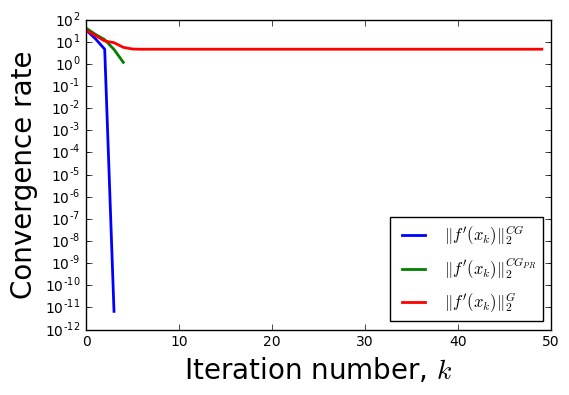

In [7]:
plt.semilogy([np.linalg.norm(grad_f(x)) for x in quad_cg_array], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in quad_grad_array[:50]], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best")
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)

### Неквадратичная функция

In [8]:
import numpy as np

n = 100
x0 = np.zeros((n,))
A = np.random.randn(n, n)
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
x0 = np.zeros(n)

#### Реализация метода Флетчера-Ривса

In [9]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = code.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
        it += 1
    return x

#### График сходимости

In [10]:
import scipy.optimize as scopt
import code 

scopt_cg_array = []
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback, options={"maxiter": 100})
x = x.x
print "CG by Polak-Rebiere"
print "||f'(x*)|| =", np.linalg.norm(grad_f(x))
print "f* =", f(x)

fr_cg_array = []
fr_callback = lambda x: callback(x, fr_cg_array)
x = ConjugateGradientFR(f, grad_f, x0, tol=1e-6, num_iter=100, callback=fr_callback)
print "CG by Fletcher-Reeves"
print "||f'(x*)|| =", np.linalg.norm(grad_f(x))
print "f* =", f(x)

grad_array = []
grad_callback = lambda x: callback(x, grad_array)
x = code.GradientDescent(f, grad_f, x0, 1e-6, 100, code.backtracking, callback=grad_callback, method="Armijo", rho=0.7, beta1=0.1)
print "Gradient Descent"
print "||f'(x*)|| =", np.linalg.norm(grad_f(x["x"]))
print "f* =", f(x["x"])

/home/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log


CG by Polak-Rebiere
||f'(x*)|| = 0.0449064049303
f* = nan
CG by Fletcher-Reeves
||f'(x*)|| = 0.00103253681333
f* = -123.844842647
Gradient Descent
||f'(x*)|| = 0.00674500806218
f* = -123.844839569


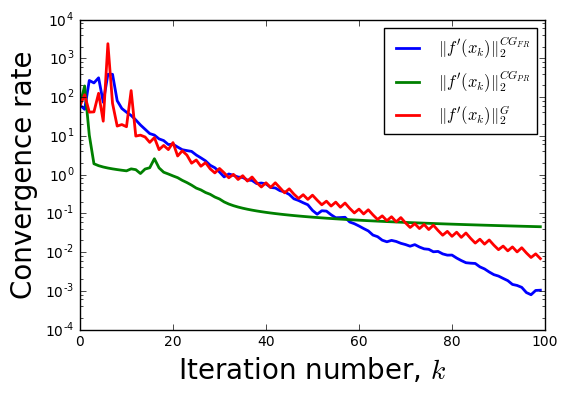

In [14]:
plt.semilogy([np.linalg.norm(grad_f(x)) for x in fr_cg_array], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array[:100]], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in grad_array[:100]], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best")
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)

## Резюме

1. Сопряжённые направления
2. Метод сопряжённых градиентов
3. Сходимость
4. Эксперименты